In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from P201_Functions import *

set_dark_mode(True)

In [15]:
#  position of small mass (in cm)
# xpos = np.array([1.092,2.026,3.017,4.023,5.019,6.011,7.021])
xpos = np.array([4,7,8,9,12])
dxpos = np.array([0.003 for i in range(len(xpos))])

In [16]:
def outlier_removal(data, times, deviations):
    """remove outliers within {deviations} std deviation"""
    distance_from_mean = abs(data - data.mean())
    not_outlier = distance_from_mean < deviations * data.std()
    removed_outliers = data.copy()[not_outlier]
    print(f"Removed {data.size-removed_outliers.size} outliers within {deviations} sigma")
    return(removed_outliers, times.copy()[not_outlier])

Periodup = 2.00191 +/- 0.00001505
Perioddown = 1.99707 +/- 0.00000612

Periodup = 2.01430 +/- 0.00001096
Perioddown = 2.01234 +/- 0.00001073

Periodup = 2.01457 +/- 0.00010500
Perioddown = 2.01376 +/- 0.00001055

Periodup = 2.02117 +/- 0.00005889
Perioddown = 2.02178 +/- 0.00012713

Periodup = 2.02811 +/- 0.00000758
Perioddown = 2.02851 +/- 0.00000863



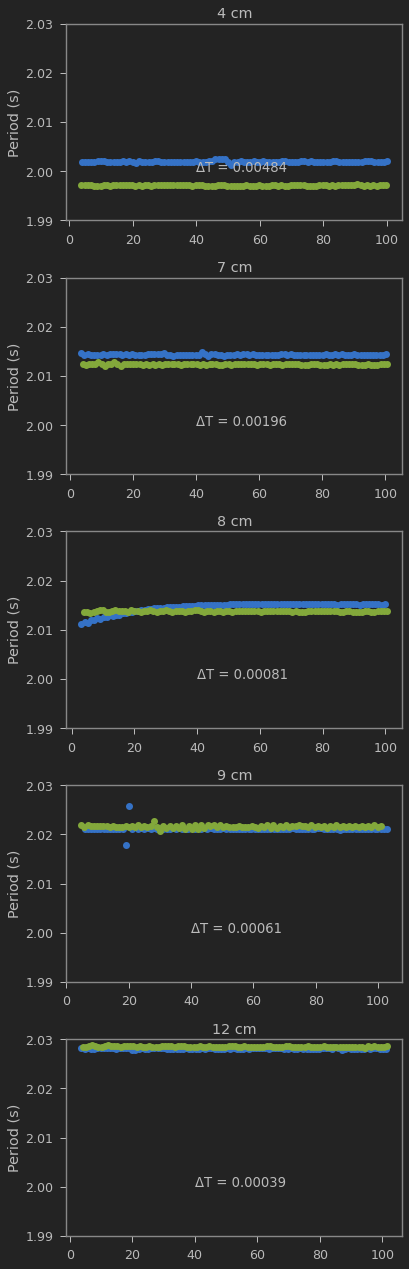

In [23]:
prefix = './KaterPendulum/data/thebrashboys/trial_1/'
# prefix = './'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

file_distances = [4, 7, 8, 9, 12]

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(6,18))
fig.tight_layout(pad=2.0)
j = 0

# file name format: trial_#_(smd or smu).txt


for i in file_distances:
    fname1 = prefix + str(i) + "_smu" + suffix # 2 - small mass up
    fname2 = prefix + str(i) + "_smd" + suffix # 1 - small mass down
    
#     fname1 = prefix + "smu_kater_data_" + str(i) + "cm" + suffix # 2 - small mass up
#     fname2 = prefix + "smd_kater_data_" + str(i) + "cm" + suffix # 1 - small mass down

#     for orientation in ["_smu", "_smd"]:
#         fname = prefix + str(i) + orientation + suffix
        
#         # read in .txt files
#         df = pd.read_csv(fname,sep='\t')
        
#         # read in times from file
#         time = np.array(df)
#         period = []
#         # period is difference between every other time (1 cycle is 3 times)
#         for k in range(2,len(time)):
#             period.append(time[k]-time[k-2])
            
#         # put periodup, timeup values in array
#         period=np.array(period)
#         time=np.array(time[2:])
        
#         # outlier removal
#         period, time=outlier_removal(period, time, 1)
        
#         # small mass up uncertainty
#         sem = period.std()/np.sqrt(len(period))
        
#         match orientation:
#             case "_smu":
#                 # append period average to tup
#                 tup.append(period.mean())
#                 # append uncertainty to dtup
#                 dtup.append(sem)
#             case "_smd":
#                 # append small mass down average to tdown
#                 tdown.append(period.mean())
#                 # append small mass down uncertainty to dtdown
#                 dtdown.append(sem)
    
        
    # read in .txt files
    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    # read in Time column of small mass up file
    timeup = np.array(dfup)
    periodup = []
    # period is difference between every other time (1 cycle is 3 times)
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
    
    # put periodup, timeup values in array
    periodup=np.array(periodup)
#     timeup=timeup[2:]
    
    # outlier removal
#     periodup, timeup=outlier_removal(periodup, timeup, 1)
    
    # small mass up uncertainty
    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    # append period average to tup
    tup.append(periodup.mean())
    # append uncertainty to dtup
    dtup.append(semup)
    
    # read in Time column of small mass down file
    timedown = np.array(dfdown)
    perioddown = []
    # period is difference between every other time (1 cycle is 3 times)
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    # put perioddown values in array
    perioddown=np.array(perioddown)
#     timedown=timedown[2:]
    
    # outlier removal
#     perioddown, timedown=outlier_removal(perioddown, timedown, 1)
    
    # small mass down uncertainty
    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f\n" % (perioddown.mean(),semdown))
    
    # append small mass down average to tdown
    tdown.append(perioddown.mean())
    # append small mass down uncertainty to dtdown
    dtdown.append(semup)
    
    # difference between smu and smd average periods
    period_diff = abs(periodup.mean()-perioddown.mean())
    
    # plotting
    axs[j].plot(timeup[2:],periodup,'o', label='smu')
    axs[j].plot(timedown[2:],perioddown,'o', label='smd')
    axs[j].set_ylabel('Period (s)')
    axs[j].set_ylim(1.99, 2.03)
    axs[j].set_title(f"{i} cm")
    axs[j].text(x=40, y=2, s=f"ΔT = {period_diff:.5f}")
    
    j += 1
    
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

In [24]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

Coefficients (from curve_fit)
[ 1.98396042e+00  4.89946880e-03 -1.00913216e-04]
Covariance Matrix (from curve_fit)
[[ 4.90260593e-05 -1.24667727e-05  7.26362079e-07]
 [-1.24667727e-05  3.35646869e-06 -2.03177936e-07]
 [ 7.26362079e-07 -2.03177936e-07  1.26986259e-08]]
Coefficients (from curve_fit)
[ 1.97153161e+00  7.15053027e-03 -1.98385385e-04]
Covariance Matrix (from curve_fit)
[[ 6.36628645e-05 -1.61887874e-05  9.43221460e-07]
 [-1.61887874e-05  4.35856908e-06 -2.63838417e-07]
 [ 9.43221460e-07 -2.63838417e-07  1.64899088e-08]]


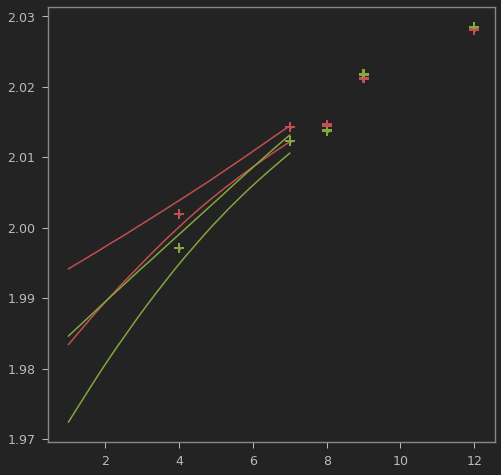

In [25]:
# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

#axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

#axs2.plot(xi,middle)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()


In [12]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))
            

Period = 2.00420 +/- 0.00052


In [13]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.8145 +/- 0.0051


In [14]:
# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
#
#g = 9.799 # value of g in Newport News
g = 9.8144

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
# The radius of the large mass is 4.753 cm
# The radius of the small mass is 3.498 cm
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    
#print (l2,t1,t2)

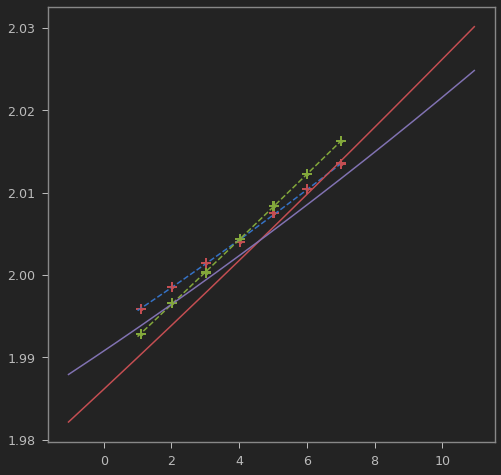

In [15]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')
#axs2.plot(xi,loweru,'r')
#axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled,'--')
#axs2.plot(xi,lowerd,'g')
#axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()

## So, we can see that the choice of the extra "fudge factor" offset changes for the chosen value of g.

### The next approach is to fit the data with the theoretical functions, rather than a simple quadratic polynomial.  The adjustable parameters in the fit function will be the value of g and the fudge factor.


Coefficients (from curve_fit)
[9.78953317]
Covariance Matrix (from curve_fit)
[[6.39497198e-05]]
Coefficients (from curve_fit)
[9.79589173]
Covariance Matrix (from curve_fit)
[[5.42798782e-05]]


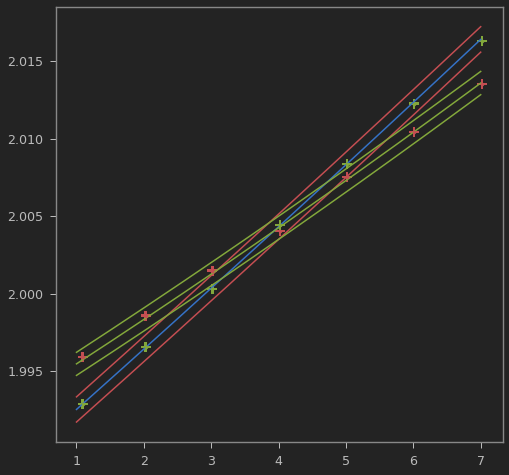

In [16]:
def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

init_vals = [9.814]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [9.814]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()



In [17]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))
            

Period = 2.00447 +/- 0.01276


In [18]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.8119 +/- 0.1249
